## 14、求解线性方程组

In [1]:
import numpy as np

In [3]:
#先填写方程的系数矩阵
a1 = np.array(
    [
        [1, -2, 1],
        [0, 2, -8],
        [-4, 5, 9]
    ]
)
a1

array([[ 1, -2,  1],
       [ 0,  2, -8],
       [-4,  5,  9]])

In [4]:
#再写方程右边的和
a2 = np.array([0, 8, -9])
a2

array([ 0,  8, -9])

In [5]:
# 调用solve方法直接求解，得到的是xyz的值
A = np.linalg.solve(a1, a2)
A

array([29., 16.,  3.])

In [6]:
#方程的验证
a1[0].dot(A)

0.0

In [8]:
#显示全部都为真，即解是正确的
a1.dot(A) == a2

array([ True,  True,  True])

In [37]:
#线性方程组也可以用逆矩阵的方法求解
#先创建系数矩阵
a2 = np.array([
    [1,1,1],
    [0,2,5],
    [2,5,-1]
])
a2

array([[ 1,  1,  1],
       [ 0,  2,  5],
       [ 2,  5, -1]])

In [39]:
#再创建方程右边的和
a4 = np.array([6, -4, 27])

In [40]:
# 求解a2方程的逆矩阵
a3 = np.linalg.inv(a2)
a3

array([[ 1.28571429, -0.28571429, -0.14285714],
       [-0.47619048,  0.14285714,  0.23809524],
       [ 0.19047619,  0.14285714, -0.0952381 ]])

In [41]:
#逆矩阵乘以和的方程的解
a3@a4

array([ 5.,  3., -2.])

## 15、numpy实现多项式曲线拟合

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#先创建数据
# b1是一个数组，在-5~5，等间距生成的50个点
b1 = np.linspace(-5, 5, 50)

In [12]:
# 假造b2，为sin(b1)，同时加上一些噪声，模拟真实世界的数据
b2 = np.sin(b1) + np.random.rand(50)

In [15]:
b1.shape,b2.shape

((50,), (50,))

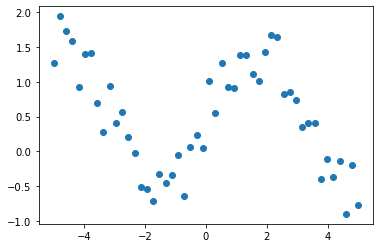

In [16]:
#先绘制图表
plt.scatter(b1, b2)

In [33]:
# 使用n次方多项式做拟合，第一个系数是自变量，第二个系数是因变量，第三个系数是所求式子的最大次方数
#所求得的是每一项的系数，从最高项到最小项
params = np.polyfit(b1, b2, 30)
params

array([ 4.90830045e-14,  3.11826668e-14, -8.44633539e-12, -5.14573002e-12,
        6.46976277e-10,  3.85340457e-10, -2.90553377e-08, -1.73236243e-08,
        8.47629779e-07,  5.20065369e-07, -1.67974323e-05, -1.09428959e-05,
        2.29185437e-04,  1.64445625e-04, -2.12460893e-03, -1.76379522e-03,
        1.26845457e-02,  1.32966522e-02, -4.10689330e-02, -6.86471887e-02,
        9.31665237e-03,  2.36321494e-01,  4.57590913e-01, -5.43065542e-01,
       -1.63248448e+00,  8.85336162e-01,  2.28401007e+00, -1.09442733e+00,
       -1.20612026e+00,  1.31192481e+00,  5.71629496e-01])

In [34]:
#np.poly1d(params)这里是POLY1D，d前面是1（一）
#作用：得到多项式系数，按照阶数从高到低排列
param_func = np.poly1d(params)
param_func

poly1d([ 4.90830045e-14,  3.11826668e-14, -8.44633539e-12, -5.14573002e-12,
        6.46976277e-10,  3.85340457e-10, -2.90553377e-08, -1.73236243e-08,
        8.47629779e-07,  5.20065369e-07, -1.67974323e-05, -1.09428959e-05,
        2.29185437e-04,  1.64445625e-04, -2.12460893e-03, -1.76379522e-03,
        1.26845457e-02,  1.32966522e-02, -4.10689330e-02, -6.86471887e-02,
        9.31665237e-03,  2.36321494e-01,  4.57590913e-01, -5.43065542e-01,
       -1.63248448e+00,  8.85336162e-01,  2.28401007e+00, -1.09442733e+00,
       -1.20612026e+00,  1.31192481e+00,  5.71629496e-01])

In [35]:
b2_predict = param_func(b1)

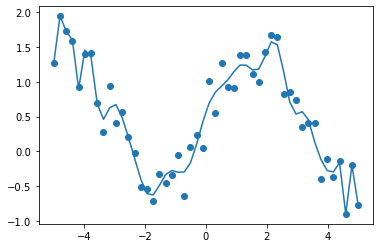

In [36]:
plt.scatter(b1, b2)
plt.plot(b1, b2_predict)